In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pickle
import torch

In [3]:
number_to_activity ={ 
        '0': 'other'
        ,'1': 'lying'
        ,'2': 'sitting'
        ,'3': 'standing'
        ,'4': 'walking'
        ,'5': 'running'
        ,'6': 'cycling'
        ,'7': 'Nordic walking'
        ,'9': 'watching TV'
        ,'10':'computer work'
        ,'11':'car driving'
        ,'12':'ascending stairs'
        ,'13':'descending stairs'
        ,'16':'vacuum cleaning'
        ,'17':'ironing'
        ,'18':'folding laundry'
        ,'19':'house cleaning'
        ,'20':'playing soccer'
        ,'24':'rope jumping'
        }
activity_to_number ={ 
         'other':'0' 
        ,'lying':'1' 
        ,'sitting':'2' 
        ,'standing':'3' 
        ,'walking':'4' 
        ,'running':'5' 
        ,'cycling':'6' 
        ,'Nordic walking':'7' 
        ,'watching TV':'9' 
        ,'computer work':'10'
        ,'car driving':'11' 
        ,'ascending stairs':'12' 
        ,'descending stairs':'13' 
        ,'vacuum cleaning':'16' 
        ,'ironing':'17' 
        ,'folding laundry':'18' 
        ,'house cleaning':'19' 
        ,'playing soccer':'20' 
        ,'rope jumping':'24' 
        }


In [4]:
def sliding_window(df, window_size, stride):
    data = df.copy()
    data = data.reset_index(drop=True)
    data = data.to_numpy()
    data_list = []
    for i in range(0, len(data), stride):
        if i + window_size < len(data):
            data_list.append(data[i:i+window_size])
        else:
            return torch.Tensor(data_list)

#Function to interpolate NaNs because we want to keep the data continuous
def interpolate_nans(df):
    df = df.interpolate(method='linear', axis=0).ffill().bfill()
    return df

In [5]:
full_df= pd.read_pickle('/Users/adirserruya/Desktop/Assignment2/human-activity-classification/subjects_data.pickle')

subject_data = {}

keys = full_df.keys()
keys = [key for key in keys if key not in [107,108]]
list_of_classes = list(number_to_activity.keys())

window_size = 400
num_features = 33
stride = 100

for key in keys:
    print(f"Now reading subject number {key}")
    df = full_df[key].copy()
    for label in list_of_classes:
        # Should perform different sliding windows here per subject
        new_data = df[df['activityID'] == int(label)]
        # Interpolate NaNs per subject per activity ( No mixup of data)
        new_data = interpolate_nans(new_data)
        # Sliding window per subject per activity
        subject_data[key,label] = sliding_window(new_data, window_size, stride)



Now reading subject number 101


/var/folders/b5/wwf8gkc96dqcxmth13t0vhj80000gn/T/ipykernel_91861/1749296775.py:10: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/torch/csrc/utils/tensor_new.cpp:233.)
  return torch.Tensor(data_list)


Now reading subject number 102
Now reading subject number 103
Now reading subject number 104
Now reading subject number 105
Now reading subject number 106
Now reading subject number 109


In [6]:
pd.to_pickle(subject_data, '/Users/adirserruya/Desktop/Assignment2/human-activity-classification/subject_data.pickle')

In [7]:
#Looking at the data
subject_data = pd.read_pickle('/Users/adirserruya/Desktop/Assignment2/human-activity-classification/subject_data.pickle')

In [16]:
subject_data[101, '1'].isnan()

tensor([[[False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False],
         ...,
         [False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False]],

        [[False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False],
         ...,
         [False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False]],

        [[False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False],
         ...,
         [False, False, False,  ..., False, False, False],
         [

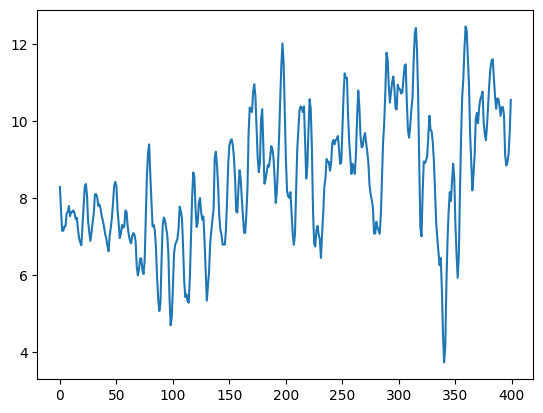

In [12]:
plt.plot(subject_data[101, '1'][0,:,5])